## Dependencies

In [54]:
import geopandas as gpd
import joblib
import numpy as np
import odc.geo.xr  # noqa: F401
import pandas as pd
import xarray as xr
import matplotlib as plt
import rasterio as rio
from rasterio import plot
from odc.stac import load
from pystac_client import Client
from shapely import geometry
from sklearn.ensemble import RandomForestClassifier
from dask.distributed import Client as dask_client
import warnings
warnings.filterwarnings('ignore')



In [38]:
# Read in data inputs

aoi = gpd.read_file("RiPyrian/wavuwavu_extent.geojson")
river_bounds = gpd.read_file("RiPyrian/wavuwavu_river.geojson")


In [39]:
lulc_dataarray = xr.DataArray("LULC_2023_wavuwavu_extent")
lulc_dataarray

<xarray.DataArray ()>
array('LULC_2023_wavuwavu_extent', dtype='<U25')

In [44]:
da = rio.open("RiPyrian/LULC_2023_wavuwavu_extent.tif")

In [53]:
da

<open DatasetReader name='RiPyrian/LULC_2023_wavuwavu_extent.tif' mode='r'>

In [58]:
with rio.open("RiPyrian/LULC_2023_wavuwavu_extent.tif") as src:
  # Get data and associated information
  data = src.read(1)  # Assuming single band data, adjust for multi-band
  transform = src.transform  # Get the geotransformation


In [83]:
data

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 4, ..., 3, 3, 3],
       [3, 3, 3, ..., 4, 3, 3],
       [3, 3, 3, ..., 4, 3, 3]], dtype=uint8)

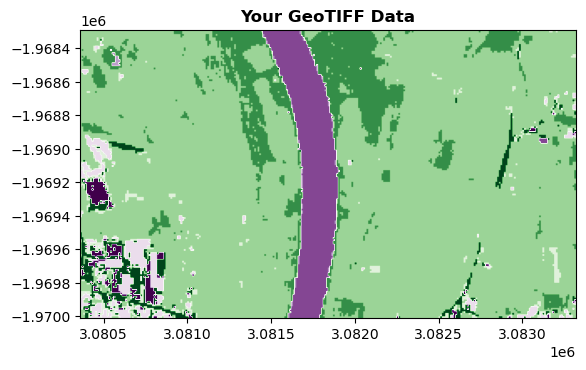

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [90]:
# Plot the data using rasterio.plot
plot.show(data, cmap='PRGn_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

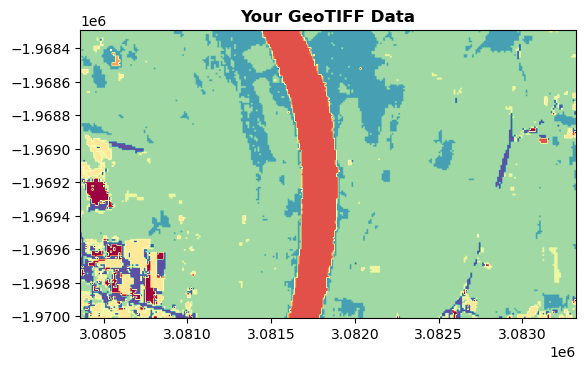

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [122]:
# Plot the data using rasterio.plot
plot.show(data, cmap='Spectral_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

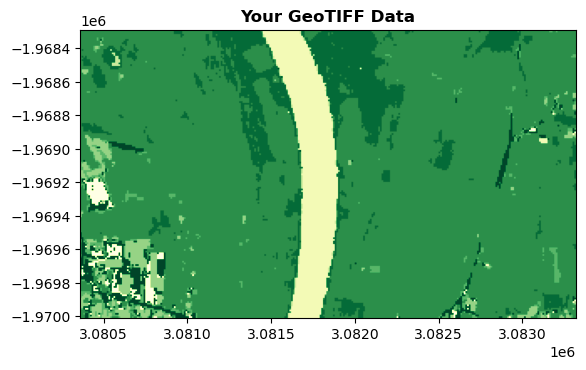

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [128]:
# Plot the data using rasterio.plot
plot.show(data, cmap='YlGn_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

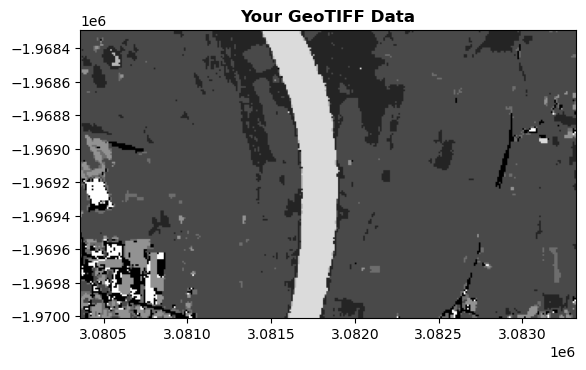

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [138]:
# Plot the data using rasterio.plot
plot.show(data, cmap='binary_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

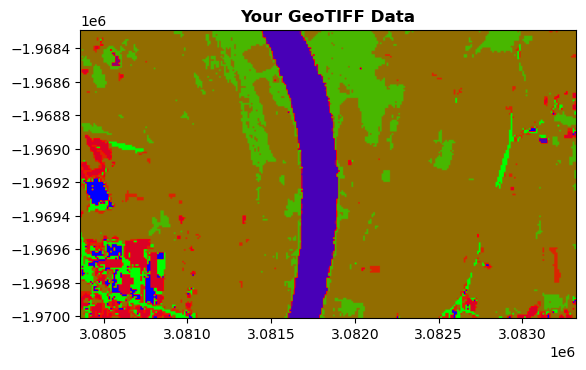

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [142]:
# Plot the data using rasterio.plot
plot.show(data, cmap='brg_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

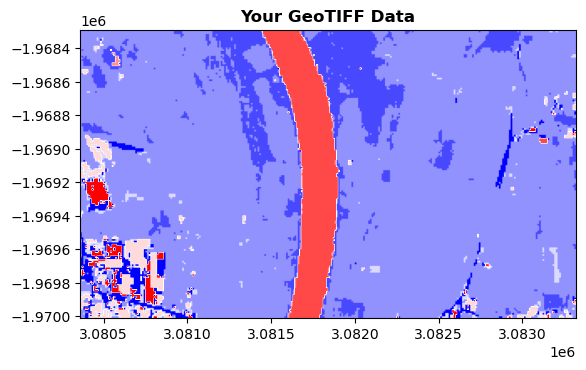

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [144]:
# Plot the data using rasterio.plot
plot.show(data, cmap='bwr', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

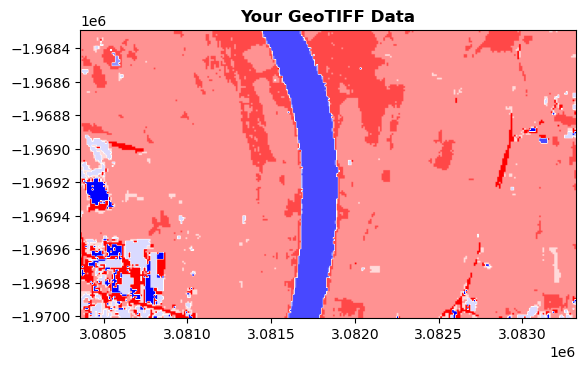

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [145]:
# Plot the data using rasterio.plot
plot.show(data, cmap='bwr_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

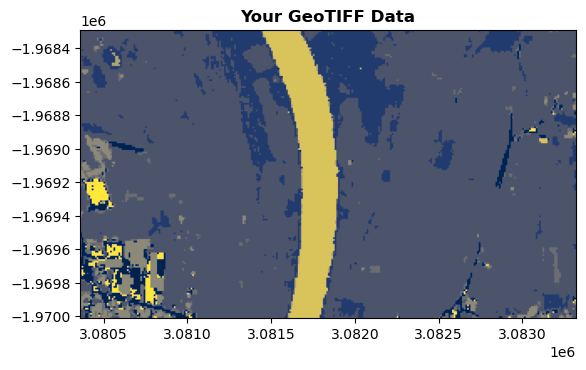

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [146]:
# Plot the data using rasterio.plot
plot.show(data, cmap='cividis', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

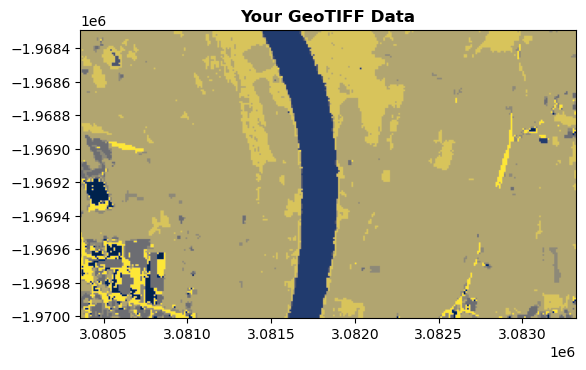

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [147]:
# Plot the data using rasterio.plot
plot.show(data, cmap='cividis_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

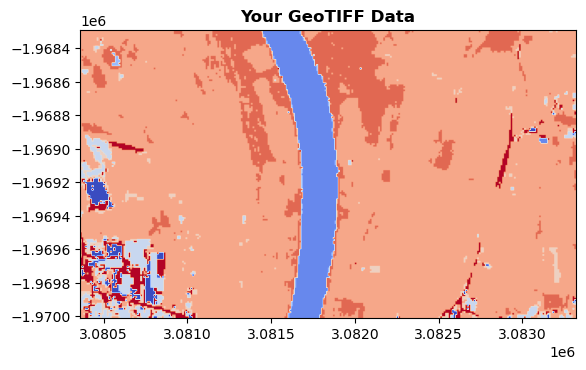

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [153]:
# Plot the data using rasterio.plot
plot.show(data, cmap='coolwarm_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

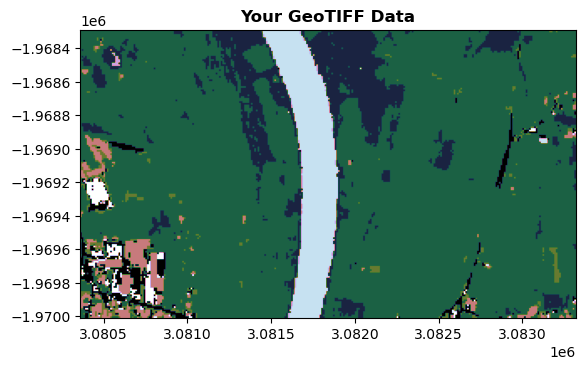

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [156]:
# Plot the data using rasterio.plot
plot.show(data, cmap='cubehelix', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

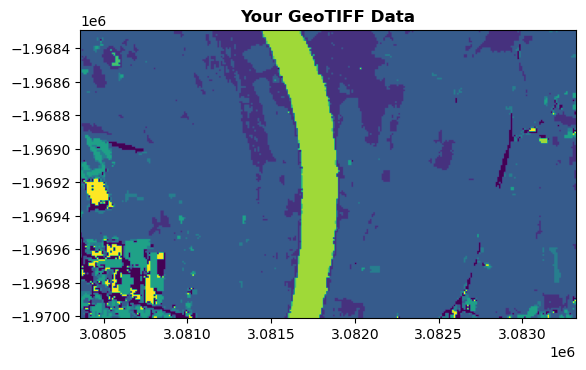

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [158]:
# Plot the data using rasterio.plot
plot.show(data, cmap='viridis', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

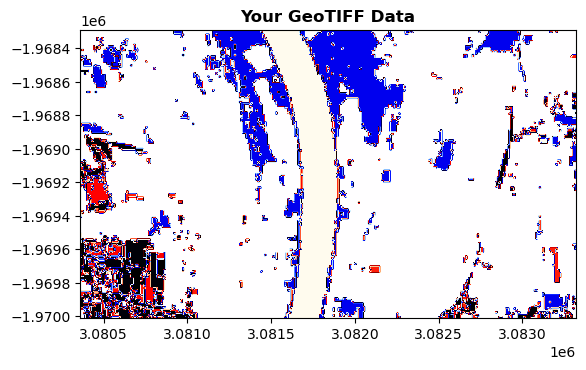

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [161]:
# Plot the data using rasterio.plot
plot.show(data, cmap='flag_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

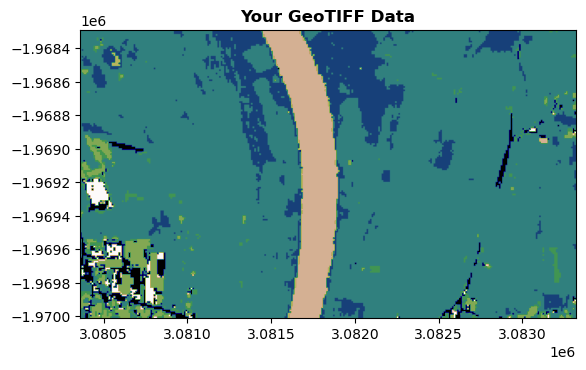

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [162]:
# Plot the data using rasterio.plot
plot.show(data, cmap='gist_earth', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

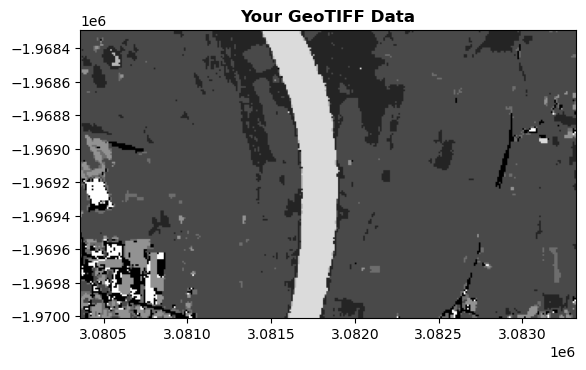

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [164]:
# Plot the data using rasterio.plot
plot.show(data, cmap='gist_gray', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

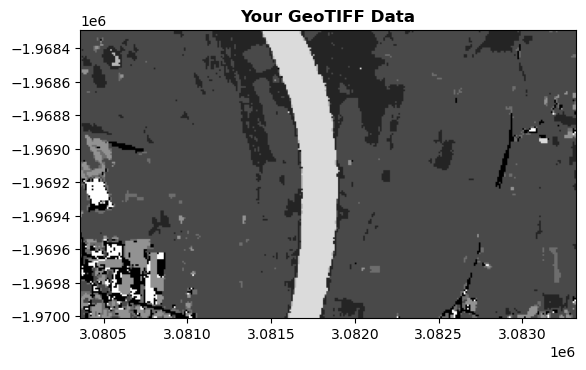

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [166]:
# Plot the data using rasterio.plot
plot.show(data, cmap='binary_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

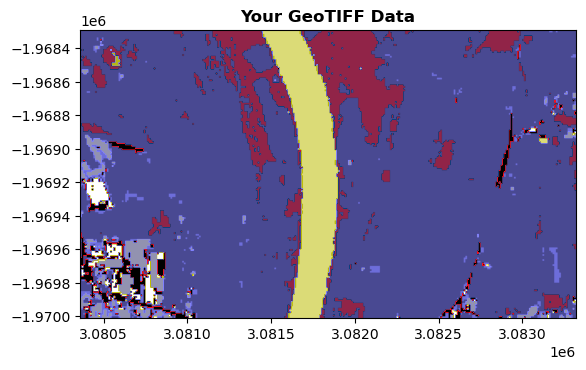

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [175]:
# Plot the data using rasterio.plot
plot.show(data, cmap='gist_stern', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

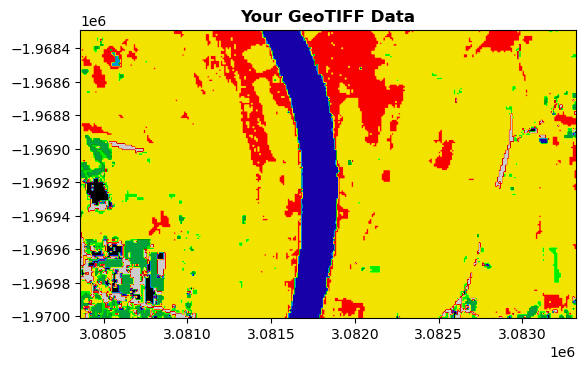

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [195]:
# Plot the data using rasterio.plot
plot.show(data, cmap='nipy_spectral_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

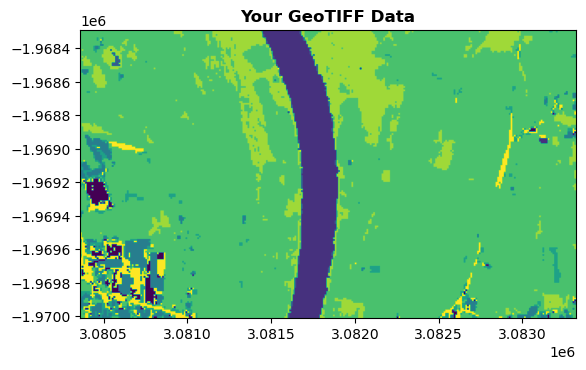

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [207]:
# Plot the data using rasterio.plot
plot.show(data, cmap='viridis_r', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

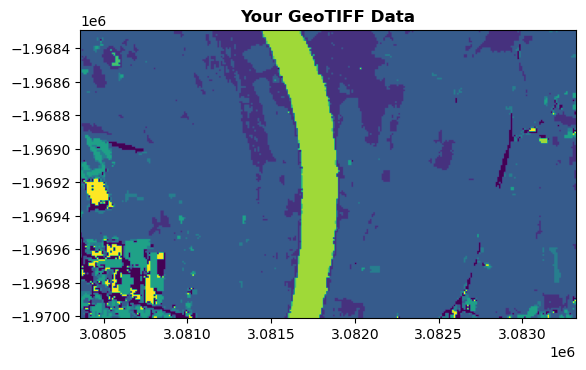

<Axes: title={'center': 'Your GeoTIFF Data'}>

In [208]:
# Plot the data using rasterio.plot
plot.show(data, cmap='viridis', transform=transform, title="Your GeoTIFF Data")
# plt.show(cmap='Reds')  # To display the plot in the notebook

In [47]:
dataarray = xr.DataArray(da)
dataarray

<xarray.DataArray 'RiPyrian/LULC_2023_wavuwavu_extent.tif' ()>
array(<open DatasetReader name='RiPyrian/LULC_2023_wavuwavu_extent.tif' mode='r'>,
      dtype=object)

In [36]:
lulc_dataset = xr.Dataset("LULC_2023_wavuwavu_extent")

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [33]:
lulc.plot.imshow(size=10)

TypeError: No numeric data to plot.